In [4]:
# Veri görselleştirmesi için Matplotlib kütüphanesini ekler
import matplotlib.pyplot as plt

# Veri görselleştirmesi için Seaborn kütüphanesini ekler
import seaborn as sns



# Bilimsel hesaplama işlemleri için NumPy kütüphanesini ekler
import numpy as np
import missingno as msno
# CSV dosyasını okuyarak veriyi bir Pandas veri çerçevesine yükler
df = pd.read_csv('ML-EdgeIIoT-dataset.csv')

# Veri çerçevesinin ilk beş satırını görüntüler
df.head()
import plotly.express as px
from IPython.display import display

from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from tqdm.notebook import tqdm
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score


NameError: name 'pd' is not defined

In [3]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 94.4 kB/s eta 0:00:0000:0100:29m


In [9]:
# Veri manipülasyonu ve analizi için Pandas kütüphanesini ekler
import pandas as pd
def get_type_missing(df):
    # Boş bir DataFrame oluşturur
    df_types = pd.DataFrame()
    
    # 'data_type' sütununa, her sütunun veri türünü ekler
    df_types['data_type'] = df.dtypes
    
    # 'missing_values' sütununa, her sütundaki eksik değerlerin toplam sayısını ekler
    df_types['missing_values'] = df.isnull().sum()
    
    # Eksik değerlere göre veri türlerini ve eksik değer sayılarını sıralar
    return df_types.sort_values(by='missing_values', ascending=False)


In [21]:
df.head()

frame.time    ip.src_host ip.dst_host arp.dst.proto_ipv4  arp.opcode  \
0        6.0  192.168.0.152         0.0                0.0         0.0   
1        6.0  192.168.0.101         0.0                0.0         0.0   
2        6.0  192.168.0.152         0.0                0.0         0.0   
3        6.0  192.168.0.101         0.0                0.0         0.0   
4        6.0  192.168.0.152         0.0                0.0         0.0   

   arp.hw.size arp.src.proto_ipv4  icmp.checksum  icmp.seq_le  \
0          0.0                0.0            0.0          0.0   
1          0.0                0.0            0.0          0.0   
2          0.0                0.0            0.0          0.0   
3          0.0                0.0            0.0          0.0   
4          0.0                0.0            0.0          0.0   

   icmp.transmit_timestamp  ...  mqtt.proto_len mqtt.protoname  mqtt.topic  \
0                      0.0  ...             0.0            0.0         0.0   
1                      0.0  ...             0.0            0.0         0.0   
2                      0.0  ...             0.0            0.0         0.0   
3                      0.0  ...             0.0            0.0         0.0   
4                      0.0  ...             0.0            0.0         0.0   

  mqtt.topic_len mqtt.ver mbtcp.len mbtcp.trans_id mbtcp.unit_id  \
0            0.0      0.0       0.0            0.0           0.0   
1            0.0      0.0       0.0            0.0           0.0   
2            0.0      0.0       0.0            0.0           0.0   
3            0.0      0.0       0.0            0.0           0.0   
4            0.0      0.0       0.0            0.0           0.0   

   Attack_label  Attack_type  
0             1         MITM  
1             1         MITM  
2             1         MITM  
3             1         MITM  
4             1         MITM  

[5 rows x 63 columns]

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.isna().sum()


arp.opcode                0
arp.hw.size               0
icmp.checksum             0
icmp.seq_le               0
http.content_length       0
http.response             0
tcp.ack                   0
tcp.ack_raw               0
tcp.checksum              0
tcp.connection.fin        0
tcp.connection.rst        0
tcp.connection.syn        0
tcp.connection.synack     0
tcp.flags                 0
tcp.flags.ack             0
tcp.len                   0
tcp.seq                   0
udp.stream                0
udp.time_delta            0
dns.qry.name              0
dns.qry.qu                0
dns.retransmission        0
dns.retransmit_request    0
mqtt.conflag.cleansess    0
mqtt.conflags             0
mqtt.hdrflags             0
mqtt.len                  0
mqtt.msgtype              0
mqtt.proto_len            0
mqtt.topic_len            0
mqtt.ver                  0
mbtcp.len                 0
Attack_label              0
Attack_type               0
dtype: int64

In [23]:
# Her bir sütundaki eksik değerlerin sayısını hesaplar
# ve bunları sıfır olmayan eksik değerlerin toplamı olarak toplar.
df.isna().sum()


frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
Length: 63, dtype: int64

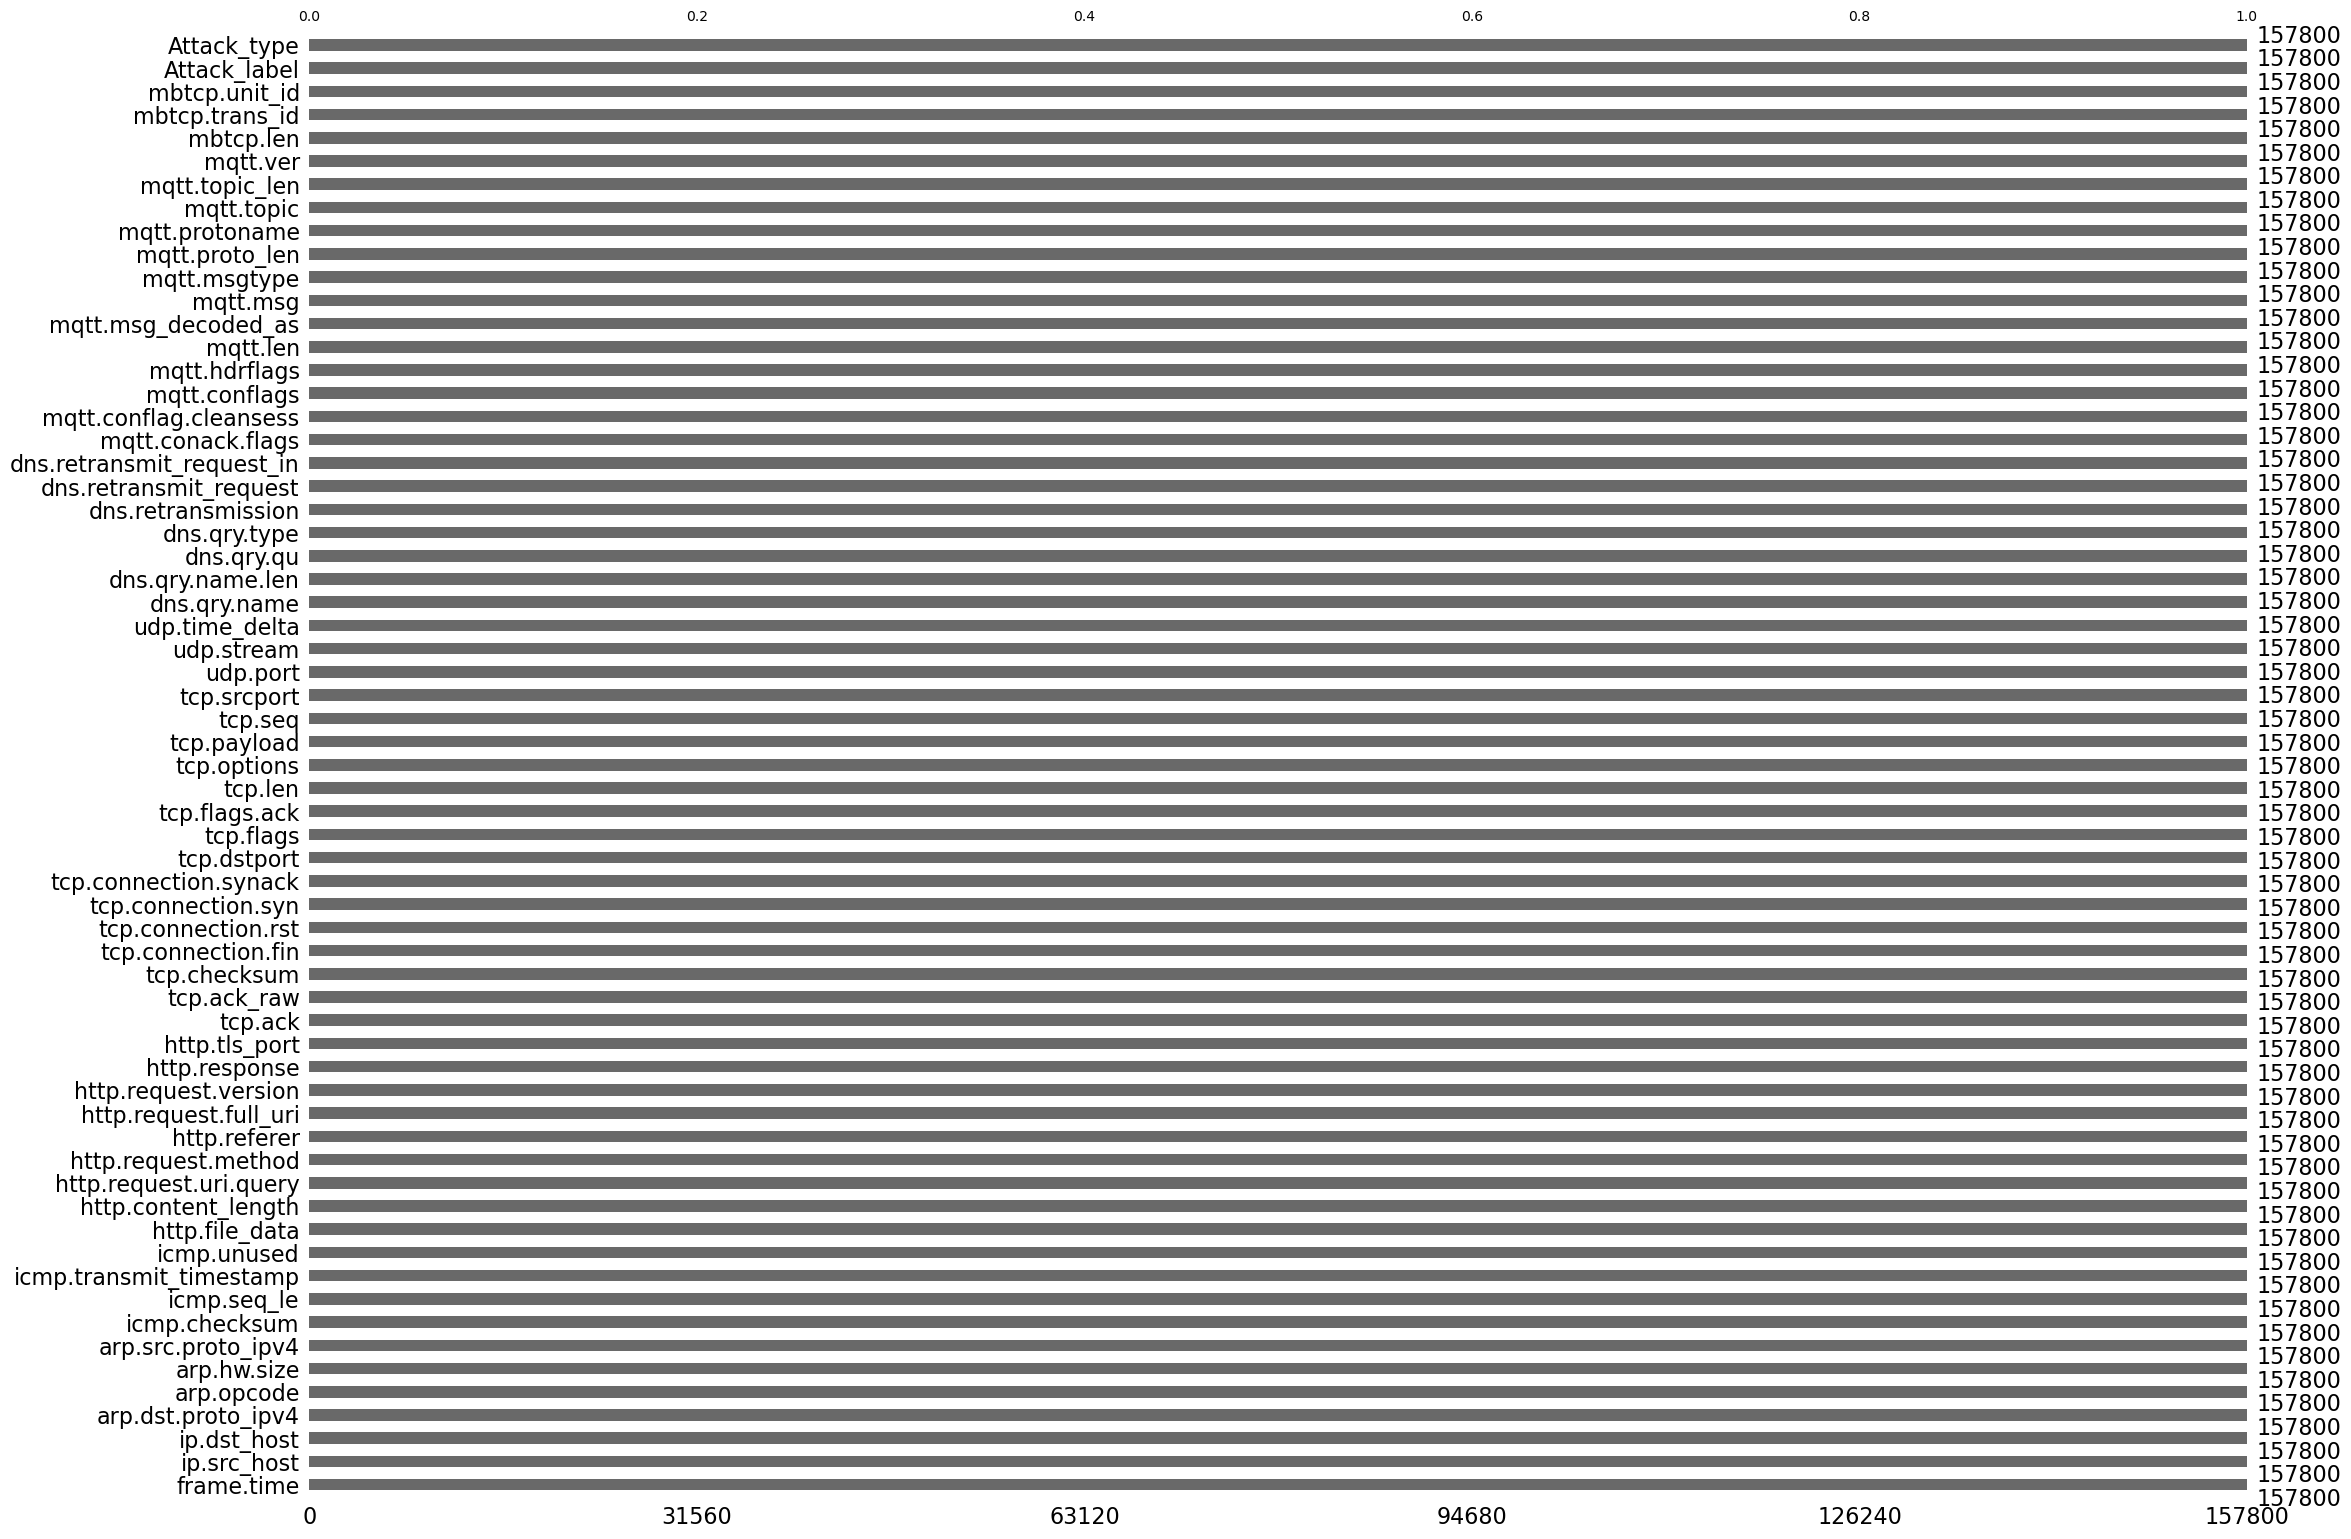

In [24]:
# Eksik değerlerin dağılımını çubuk grafikle görselleştirir.
# Bu, her sütundaki eksik değerlerin yüzdesini gösterir.
msno.bar(df)

# Görselleştirmeyi ekrana getirir.
plt.show()


In [25]:
get_type_missing(df)

data_type  missing_values
frame.time               object               0
mqtt.conflags           float64               0
tcp.srcport              object               0
udp.port                float64               0
udp.stream              float64               0
...                         ...             ...
tcp.connection.synack   float64               0
tcp.dstport             float64               0
tcp.flags               float64               0
tcp.flags.ack           float64               0
Attack_type              object               0

[63 rows x 2 columns]

In [26]:
df.describe()
# Verilen DataFrame'deki her bir sütundaki eksik değerlerin türlerini döndürür.

arp.opcode    arp.hw.size  icmp.checksum    icmp.seq_le  \
count  157800.000000  157800.000000  157800.000000  157800.000000   
mean        0.014195       0.059848    3047.291838    3239.979778   
std         0.149783       0.596245   11144.328203   11406.072994   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         2.000000       6.000000   65532.000000   65524.000000   

       icmp.transmit_timestamp  icmp.unused  http.content_length  \
count             1.578000e+05     157800.0        157800.000000   
mean              4.046816e+04          0.0            14.715520   
std               1.764075e+06          0.0           229.659671   
min               0.000000e+00          0.0             0.000000   
25%               0.000000e+00          0.0             0.000000   
50%               0.000000e+00          0.0             0.000000   
75%               0.000000e+00          0.0             0.000000   
max               7.728902e+07          0.0         83655.000000   

       http.response  http.tls_port       tcp.ack  ...       mqtt.len  \
count  157800.000000       157800.0  1.578000e+05  ...  157800.000000   
mean        0.045748            0.0  7.160039e+07  ...       0.419341   
std         0.208938            0.0  3.101231e+08  ...       3.606594   
min         0.000000            0.0  0.000000e+00  ...       0.000000   
25%         0.000000            0.0  0.000000e+00  ...       0.000000   
50%         0.000000            0.0  1.000000e+00  ...       0.000000   
75%         0.000000            0.0  4.790000e+02  ...       0.000000   
max         1.000000            0.0  2.147333e+09  ...      39.000000   

       mqtt.msg_decoded_as   mqtt.msgtype  mqtt.proto_len  mqtt.topic_len  \
count             157800.0  157800.000000   157800.000000   157800.000000   
mean                   0.0       0.161331        0.031686        0.189506   
std                    0.0       1.293453        0.354598        2.124206   
min                    0.0       0.000000        0.000000        0.000000   
25%                    0.0       0.000000        0.000000        0.000000   
50%                    0.0       0.000000        0.000000        0.000000   
75%                    0.0       0.000000        0.000000        0.000000   
max                    0.0      14.000000        4.000000       24.000000   

            mqtt.ver  mbtcp.len  mbtcp.trans_id  mbtcp.unit_id   Attack_label  
count  157800.000000   157800.0        157800.0       157800.0  157800.000000  
mean        0.031686        0.0             0.0            0.0       0.846001  
std         0.354598        0.0             0.0            0.0       0.360949  
min         0.000000        0.0             0.0            0.0       0.000000  
25%         0.000000        0.0             0.0            0.0       1.000000  
50%         0.000000        0.0             0.0            0.0       1.000000  
75%         0.000000        0.0             0.0            0.0       1.000000  
max         4.000000        0.0             0.0            0.0       1.000000  

[8 rows x 43 columns]

In [27]:
df.describe(include='object')
#DataFrame'in istatistiksel özetini sağlar.

frame.time    ip.src_host    ip.dst_host arp.dst.proto_ipv4  \
count          157800         157800         157800             157800   
unique         155186          19090           8084                  9   
top     192.168.0.128  192.168.0.128  192.168.0.128                  0   
freq             1402          72546          75373             126882   

       arp.src.proto_ipv4  http.file_data  http.request.uri.query  \
count              157800        157800.0                157800.0   
unique                  9           497.0                  1666.0   
top                     0             0.0                     0.0   
freq               110040         75880.0                 92264.0   

       http.request.method  http.referer http.request.full_uri  \
count               157800      157800.0                157800   
unique                   7           5.0                  4074   
top                      0           0.0                     0   
freq                 54062      108648.0                 54084   

       http.request.version tcp.options tcp.payload  tcp.srcport  \
count                157800      157800      157800     157800.0   
unique                    9       73140       27370      33551.0   
top                       0           0           0         80.0   
freq                  55276       27399       75013      33569.0   

        dns.qry.name.len  mqtt.conack.flags  mqtt.msg  mqtt.protoname  \
count           157800.0           157800.0  157800.0        157800.0   
unique               9.0                4.0     118.0             4.0   
top                  0.0                0.0       0.0             0.0   
freq            141189.0           125032.0  125032.0        125032.0   

        mqtt.topic Attack_type  
count     157800.0      157800  
unique         4.0          15  
top            0.0      Normal  
freq      125032.0       24301

In [28]:
df.columns
#DataFrame'in sütun adlarına erişebilir ve bu adları bir liste olarak al

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [79]:
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file('Data Analysis.html')

In [82]:
df.head()

arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  http.content_length  \
0         0.0          0.0            0.0          0.0                  0.0   
1         0.0          0.0            0.0          0.0                  0.0   
2         0.0          0.0            0.0          0.0                  0.0   
3         0.0          0.0            0.0          0.0                  0.0   
4         0.0          0.0            0.0          0.0                  0.0   

   http.response  tcp.ack  tcp.ack_raw  tcp.checksum  tcp.connection.fin  \
0            0.0      0.0          0.0           0.0                 0.0   
1            0.0      0.0          0.0           0.0                 0.0   
2            0.0      0.0          0.0           0.0                 0.0   
3            0.0      0.0          0.0           0.0                 0.0   
4            0.0      0.0          0.0           0.0                 0.0   

   tcp.connection.rst  tcp.connection.syn  tcp.connection.synack  tcp.flags  \
0                 0.0                 0.0                    0.0        0.0   
1                 0.0                 0.0                    0.0        0.0   
2                 0.0                 0.0                    0.0        0.0   
3                 0.0                 0.0                    0.0        0.0   
4                 0.0                 0.0                    0.0        0.0   

   tcp.flags.ack  tcp.len  tcp.seq  udp.stream  udp.time_delta  dns.qry.name  \
0            0.0      0.0      0.0         0.0             0.0           0.0   
1            0.0      0.0      0.0         0.0             0.0           0.0   
2            0.0      0.0      0.0         0.0             0.0           0.0   
3            0.0      0.0      0.0         0.0             0.0           0.0   
4            0.0      0.0      0.0         0.0             0.0           0.0   

   dns.qry.qu  dns.retransmission  dns.retransmit_request  \
0         0.0                 0.0                     0.0   
1         0.0                 0.0                     0.0   
2         0.0                 0.0                     0.0   
3         0.0                 0.0                     0.0   
4         0.0                 0.0                     0.0   

   mqtt.conflag.cleansess  mqtt.conflags  mqtt.hdrflags  mqtt.len  \
0                     0.0            0.0            0.0       0.0   
1                     0.0            0.0            0.0       0.0   
2                     0.0            0.0            0.0       0.0   
3                     0.0            0.0            0.0       0.0   
4                     0.0            0.0            0.0       0.0   

   mqtt.msgtype  mqtt.proto_len  mqtt.topic_len  mqtt.ver  mbtcp.len  \
0           0.0             0.0             0.0       0.0        0.0   
1           0.0             0.0             0.0       0.0        0.0   
2           0.0             0.0             0.0       0.0        0.0   
3           0.0             0.0             0.0       0.0        0.0   
4           0.0             0.0             0.0       0.0        0.0   

   Attack_label Attack_type  
0             1        MITM  
1             1        MITM  
2             1        MITM  
3             1        MITM  
4             1        MITM

In [32]:
print(df['ip.src_host'].value_counts().head())
print('_________________________________________________________')
print(df['ip.dst_host'].value_counts().head())
print('_________________________________________________________')
print(df['arp.src.proto_ipv4'].value_counts().head())
print('_________________________________________________________')
print(df['arp.dst.proto_ipv4'].value_counts().head())

ip.src_host
192.168.0.128    72546
192.168.0.170    47688
192.168.0.101    10126
0                 7991
0.0.0.0            208
Name: count, dtype: int64
_________________________________________________________
ip.dst_host
192.168.0.128    75373
192.168.0.170    42290
0                20214
192.168.0.101    10097
0.0               1214
Name: count, dtype: int64
_________________________________________________________
arp.src.proto_ipv4
0                110040
0                 43112
0.0                3074
192.168.0.128       683
192.168.0.170       562
Name: count, dtype: int64
_________________________________________________________
arp.dst.proto_ipv4
0                126882
0                 26728
192.168.0.128      2052
0.0                1214
192.168.0.170       595
Name: count, dtype: int64


In [33]:
df['Attack_label'].value_counts()

Attack_label
1    133499
0     24301
Name: count, dtype: int64

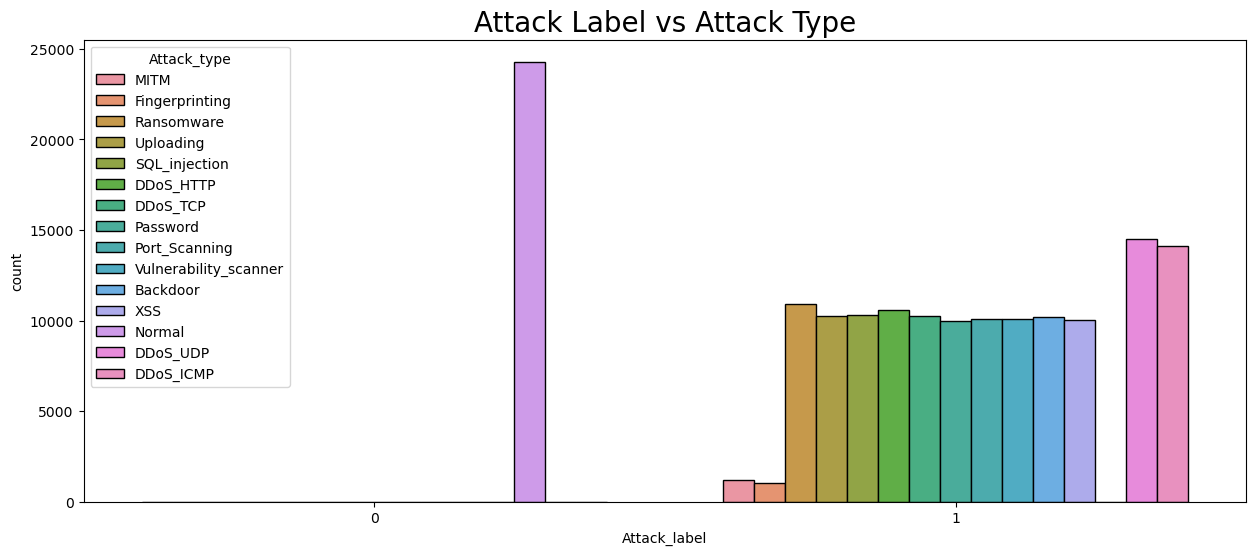

In [34]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Attack_label', hue='Attack_type', edgecolor='black', linewidth=1)
plt.title('Attack Label vs Attack Type', fontsize=20)
plt.show()

In [85]:
# icmp.checksum tcp.checksum

NameError: name 'label_col' is not defined

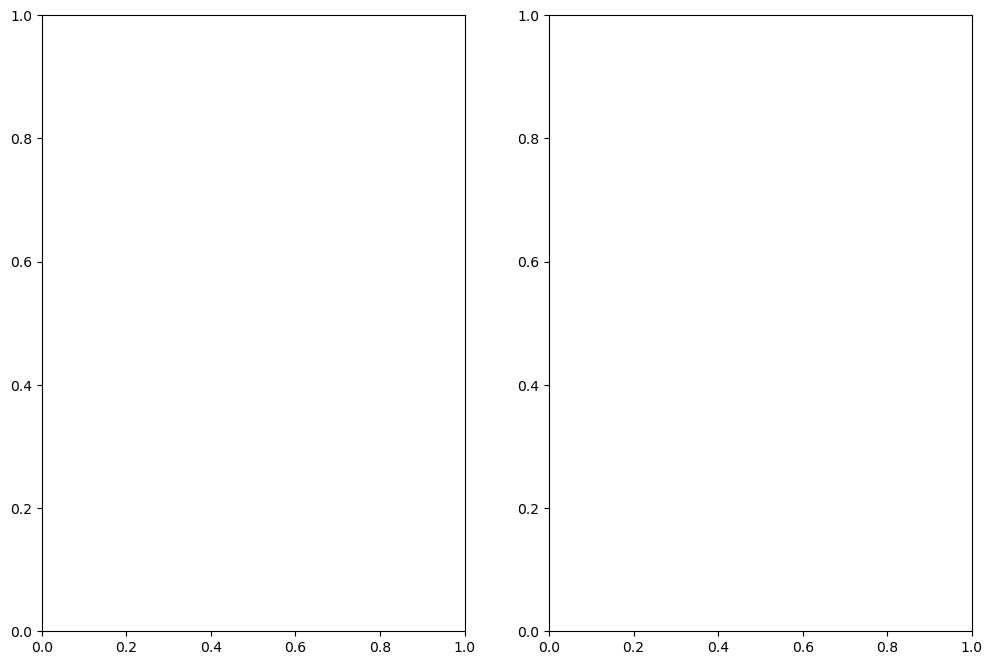

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

explode = list((np.array(list(df[label_col].dropna().value_counts())) / sum(list(df[label_col].dropna().value_counts())))[::-1])
labels = list(df[label_col].dropna().unique())
sizes = df[label_col].value_counts()

ax2.pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))

sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")

plt.show()


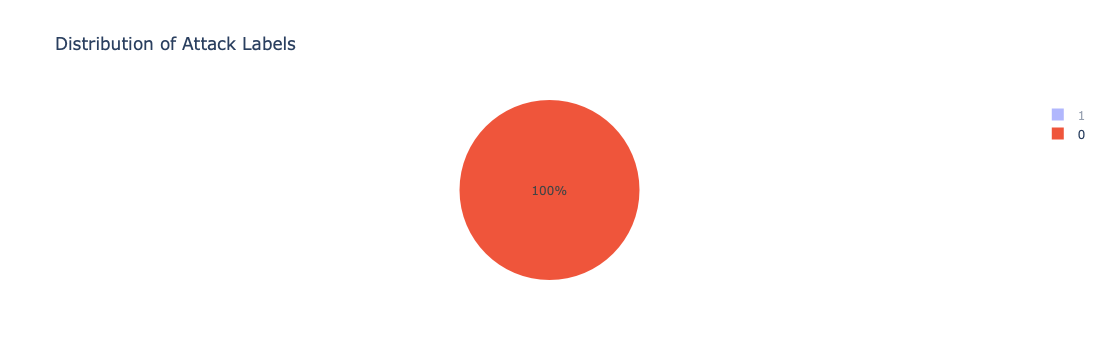

In [37]:
import plotly.express as px

# Attack_label sütunundaki değerlerin dağılımını gösteren bir pasta grafiği oluşturur
fig = px.pie(df, names='Attack_label', title='Distribution of Attack Labels')

# Oluşturulan pasta grafiğini gösterir
fig.show()


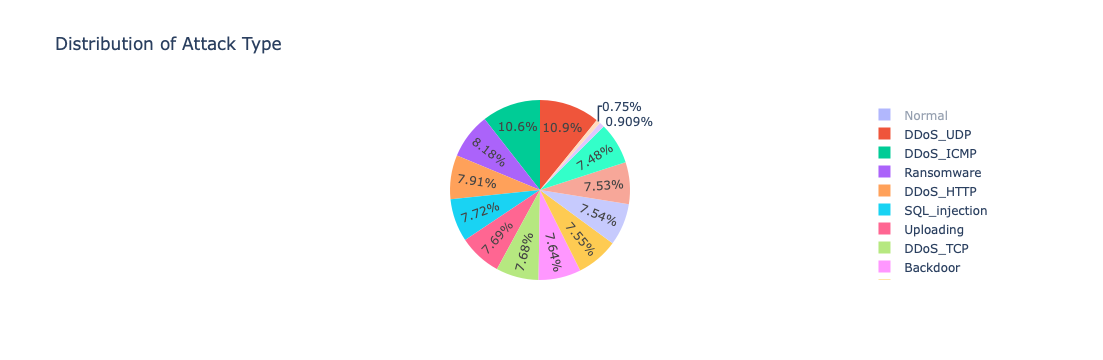

In [96]:
fig = px.pie(df, names='Attack_type', title='Distribution of Attack Type')
fig.show()

In [39]:
# just for fun explore these values in the http.file_data column

df[df['Attack_label'] == 1]['http.file_data'].value_counts()

http.file_data
0.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [40]:
# 'mqtt.topic' sütunundaki benzersiz değerlerin sayısını hesaplar ve her bir değeri sayısına göre sıralar
df['mqtt.topic'].value_counts()


mqtt.topic
0.0                         125032
0                            23055
0.0                           8467
Temperature_and_Humidity      1246
Name: count, dtype: int64

In [41]:
# 'mqtt.protoname' sütunundaki benzersiz değerlerin sayısını hesaplar ve her bir değeri sayısına göre sıralar
df['mqtt.protoname'].value_counts()


mqtt.protoname
0.0     125032
0        23051
0.0       8467
MQTT      1250
Name: count, dtype: int64

In [42]:
# 'dns.qry.name.len' sütunundaki benzersiz değerlerin sayısını hesaplar ve her bir değeri sayısına göre sıralar
df['dns.qry.name.len'].value_counts()


dns.qry.name.len
0.0                       141189
0                          14495
0.0                         1860
1.0                          227
1.debian.pool.ntp.org         10
0.debian.pool.ntp.org          8
3.debian.pool.ntp.org          7
2.debian.pool.ntp.org          3
_googlecast._tcp.local         1
Name: count, dtype: int64

In [43]:
# 'http.request.method' sütunundaki benzersiz değerlerin sayısını hesaplar ve her bir değeri sayısına göre sıralar
df['http.request.method'].value_counts()


http.request.method
0          54062
0.0        53430
0.0        43112
GET         6676
POST         267
TRACE        252
OPTIONS        1
Name: count, dtype: int64

In [44]:
# Kaldırılacak sütunların listesi
drop_columns = [
    "frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4", "arp.dst.proto_ipv4",
    "http.file_data", "http.request.full_uri", "icmp.transmit_timestamp",
    "http.request.uri.query", "tcp.options", "tcp.payload", "tcp.srcport",
    "tcp.dstport", "udp.port", "mqtt.msg", "icmp.unused", "http.tls_port", 'dns.qry.type', 'dns.retransmit_request_in',
    "mqtt.msg_decoded_as", "mbtcp.trans_id", "mbtcp.unit_id", "http.request.method", "http.referer", "http.request.version",
    "dns.qry.name.len", "mqtt.conack.flags", "mqtt.protoname", "mqtt.topic"
]

# Belirtilen sütunları veri çerçevesinden kaldırır
df.drop(drop_columns, axis=1, inplace=True)



In [45]:
# 'tcp.flags.ack' sütununa göre gruplandırılmış 'Attack_label' sütunundaki değerlerin yüzdelik dağılımlarını hesaplar
# Bu gruplamayı yazdırmaz, sadece sonucu döndürür
df['Attack_label'].groupby(df['tcp.flags.ack']).value_counts(normalize=True)
# hence we group by is prefered


tcp.flags.ack  Attack_label
0.0            1               0.935005
               0               0.064995
1.0            1               0.794896
               0               0.205104
Name: proportion, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   arp.opcode              157800 non-null  float64
 1   arp.hw.size             157800 non-null  float64
 2   icmp.checksum           157800 non-null  float64
 3   icmp.seq_le             157800 non-null  float64
 4   http.content_length     157800 non-null  float64
 5   http.response           157800 non-null  float64
 6   tcp.ack                 157800 non-null  float64
 7   tcp.ack_raw             157800 non-null  float64
 8   tcp.checksum            157800 non-null  float64
 9   tcp.connection.fin      157800 non-null  float64
 10  tcp.connection.rst      157800 non-null  float64
 11  tcp.connection.syn      157800 non-null  float64
 12  tcp.connection.synack   157800 non-null  float64
 13  tcp.flags               157800 non-null  float64
 14  tcp.flags.ack       

In [47]:
df['Attack_label'].dtype

dtype('int64')

In [48]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder sınıfını içe aktarır
le = LabelEncoder()

# 'Attack_label' sütunundaki kategorik değerleri sayısal değerlere dönüştürür
df['Attack_label'] = le.fit_transform(df['Attack_label'])

# Dönüştürülmüş 'Attack_label' sütunundaki değerlerin sayısını gösterir
df['Attack_label'].value_counts()


Attack_label
1    133499
0     24301
Name: count, dtype: int64

In [49]:
# 'Attack_label' ve 'Attack_type' sütunlarını veri setinden kaldırarak bağımsız değişkenleri (X) oluşturur
X = df.drop(['Attack_label', 'Attack_type'], axis=1)

# 'Attack_label' sütununu bağımlı değişken olarak ayarlar
y_label = df['Attack_label']

# 'Attack_type' sütununu bağımlı değişken olarak ayarlar
y_type = df['Attack_type']


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_label, y_test_label = train_test_split(X, y_label, test_size=0.2, random_state=42)

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_label_resampled = smote.fit_resample(X_train, y_train_label)

In [52]:
print(y_train_label.value_counts())
print(y_train_label_resampled.value_counts())

Attack_label
1    106924
0     19316
Name: count, dtype: int64
Attack_label
1    106924
0    106924
Name: count, dtype: int64


In [53]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression sınıfını içe aktarır.

logreg = LogisticRegression()

# LogisticRegression sınıfından bir örnek oluşturur.


logreg.fit(X_train_resampled, y_train_label_resampled)

# Modeli eğitim verilerine uyum sağlar (X_train_resampled ve y_train_label_resampled kullanarak).

y_pred = logreg.predict(X_test)

# Test verileri için etiketleri tahmin eder (X_test kullanarak).


accuracy = logreg.score(X_test, y_test_label)
print("Accuracy:", accuracy)

# Modelin performansını değerlendirir ve doğruluğunu hesaplar (X_test ve y_test_label kullanarak).


Accuracy: 0.4594106463878327


In [54]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train_resampled, y_train_label_resampled)

# Predict the labels for the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = decision_tree.score(X_test, y_test_label)
print("Accuracy:", accuracy)

Accuracy: 0.9601077313054499


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion matrix
cm = confusion_matrix(y_test_label, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# DecisionTreeClassifier modelinin bir örneğini oluşturur
decision_tree = DecisionTreeClassifier()

# Ayarlanacak hiperparametreleri tanımlar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV'nin bir örneğini oluşturur
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, n_jobs=-1)

# GridSearchCV'yi eğitim verisine uyum sağlar
grid_search.fit(X_train_resampled, y_train_label_resampled)

# En iyi hiperparametreleri alır
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# En iyi hiperparametrelerle yeni bir DecisionTreeClassifier modelinin bir örneğini oluşturur
decision_tree_best = DecisionTreeClassifier(**best_params)

# Modeli eğitim verisine uyum sağlar
decision_tree_best.fit(X_train_resampled, y_train_label_resampled)

# Test verisi için etiketleri tahmin eder
y_pred = decision_tree_best.predict(X_test)

# Modeli değerlendirir
accuracy = accuracy_score(y_test_label, y_pred)
print("Accuracy:", accuracy)

# Karışıklık matrisi oluşturur
cm = confusion_matrix(y_test_label, y_pred)

# Karışıklık matrisini ısı haritası olarak çizer
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.title("Karışıklık Matrisi")
plt.show()


In [57]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier modelinin bir örneğini oluşturur
# 'n_jobs' parametresi, paralel işlem sayısını belirtir (-1 tüm işlemcileri kullanır)
# 'random_state' parametresi, rastgele sayı üretecinin durumunu kontrol eder ve tekrarlanabilirliği sağlar
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)

# Modeli eğitim verisine uyum sağlar
random_forest.fit(X_train_resampled, y_train_label_resampled)

# Test verisi için etiketleri tahmin eder
y_pred = random_forest.predict(X_test)

# Modeli değerlendirir
accuracy = random_forest.score(X_test, y_test_label)
print("Accuracy:", accuracy)


Accuracy: 0.9634030418250951


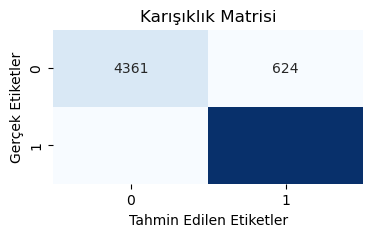

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion_matrix fonksiyonunu içe aktarır.

# Karışıklık matrisini hesaplar
cm = confusion_matrix(y_test_label, y_pred)

# heatmap olarak karışıklık matrisini çizdirir
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.title("Karışıklık Matrisi")
plt.show()

# Karışıklık matrisini ısı haritası olarak görselleştirir


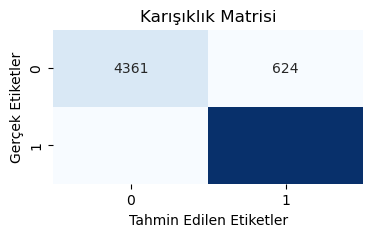

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Karışıklık matrisini hesaplar
cm = confusion_matrix(y_test_label, y_pred)

# Karışıklık matrisini ısı haritası olarak çizer
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.title("Karışıklık Matrisi")
plt.show()


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier modelinin bir örneğini oluşturur
# 'random_state' parametresi, rastgele sayı üretecinin durumunu kontrol eder ve tekrarlanabilirliği sağlar
# 'n_jobs' parametresi, paralel işlem sayısını belirtir (-1 tüm işlemcileri kullanır)
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

# Ayarlanacak hiperparametreleri tanımlar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10]
}

# GridSearchCV'nin bir örneğini oluşturur
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)

# GridSearchCV'yi eğitim verisine uyum sağlar
grid_search.fit(X_train_resampled, y_train_label_resampled)

# En iyi hiperparametreleri alır
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# En iyi hiperparametrelerle yeni bir RandomForestClassifier modelinin bir örneğini oluşturur
random_forest_best = RandomForestClassifier(**best_params)

# Modeli eğitim verisine uyum sağlar
random_forest_best.fit(X_train_resampled, y_train_label_resampled)

# Test verisi için etiketleri tahmin eder
y_pred = random_forest_best.predict(X_test)

# Modeli değerlendirir
accuracy = random_forest_best.score(X_test, y_test_label)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Scores: 0.9725787705016646
Accuracy: 0.9736058301647655


In [61]:
# Verileri eğitim ve test setlerine ayırır
# X: Bağımsız değişkenler
# y_type: 'Attack_type' sütunu, bağımlı değişken
# test_size: Test setinin boyutu, genellikle 0.2 olarak belirlenir (verilerin %20'si test seti olacak şekilde)
# random_state: Verilerin rastgele bölünmesi için kullanılan rastgele sayı üreteci
X_train, X_test, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2, random_state=42)


In [62]:
from imblearn.over_sampling import SMOTE

# SMOTE sınıfından bir örnek oluşturur
# 'sampling_strategy' parametresi, yeniden örnekleme stratejisini belirtir ('auto', 'minority' veya bir float değer)
smote = SMOTE(sampling_strategy='auto')

# Eğitim verisine SMOTE'u uygular
# SMOTE, dengesizlik sorununu çözmek için azınlık sınıfındaki örnekleri arttırır
X_train_resampled, y_train_type_resampled = smote.fit_resample(X_train, y_train_type)


In [63]:
# Eğitim setindeki 'Attack_type' sütunundaki sınıf dağılımını yazdırır
print(y_train_type.value_counts())

# Yeniden örneklemeden sonra eğitim setindeki 'Attack_type' sütunundaki sınıf dağılımını yazdırır
print(y_train_type_resampled.value_counts())


Attack_type
Normal                   19316
DDoS_UDP                 11594
DDoS_ICMP                11254
Ransomware                8864
DDoS_HTTP                 8432
DDoS_TCP                  8286
Uploading                 8254
SQL_injection             8222
Backdoor                  8222
Vulnerability_scanner     8067
Password                  8016
XSS                       8007
Port_Scanning             7943
MITM                       959
Fingerprinting             804
Name: count, dtype: int64
Attack_type
Password                 19316
Uploading                19316
Vulnerability_scanner    19316
SQL_injection            19316
Normal                   19316
Backdoor                 19316
DDoS_HTTP                19316
Port_Scanning            19316
DDoS_TCP                 19316
Ransomware               19316
XSS                      19316
DDoS_ICMP                19316
DDoS_UDP                 19316
MITM                     19316
Fingerprinting           19316
Name: count, dtype: 

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Karar Ağacı Sınıflandırıcı modelinin sınıfını içe aktarır.

# Karar Ağacı Sınıflandırıcı modelinin bir örneğini oluşturur
decision_tree = DecisionTreeClassifier()

# Karar Ağacı Sınıflandırıcı modelinin bir örneğini oluşturur.

# Modeli eğitim verilerine uyarar
decision_tree.fit(X_train_resampled, y_train_type_resampled)

# Model, eğitim verilerine uyum sağlar (X_train_resampled ve y_train_type_resampled kullanarak).

# Test verileri için etiketleri tahmin eder
y_pred = decision_tree.predict(X_test)

# Test verileri için etiketleri tahmin eder (X_test kullanarak).

# Modelin performansını değerlendirir
accuracy = decision_tree.score(X_test, y_test_type)
print("Doğruluk:", accuracy)

# Modelin performansını değerlendirir ve doğruluk değerini hesaplar (X_test ve y_test_type kullanarak).


Doğruluk: 0.8486058301647655


In [65]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier modelinin bir örneğini oluşturur
decision_tree = DecisionTreeClassifier()

# Modeli eğitim verisine uyum sağlar
decision_tree.fit(X_train_resampled, y_train_type_resampled)

# Test verisi için etiketleri tahmin eder
y_pred = decision_tree.predict(X_test)

# Modeli değerlendirir
accuracy = decision_tree.score(X_test, y_test_type)
print("Accuracy:", accuracy)


Accuracy: 0.8477820025348543


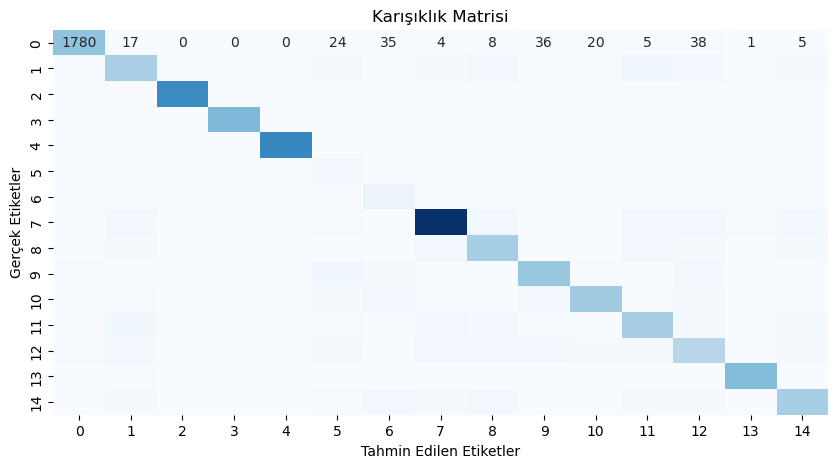

In [67]:
import seaborn as sns

# Karışıklık matrisini hesaplar
cm = confusion_matrix(y_test_type, y_pred)

# Karışıklık matrisini ısı haritası olarak çizer
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.title("Karışıklık Matrisi")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# DecisionTreeClassifier modelinin bir örneğini oluşturur
decision_tree = DecisionTreeClassifier()

# Ayarlanacak hiperparametreleri tanımlar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV'nin bir örneğini oluşturur
# cv parametresi, çapraz doğrulama için kat sayısını belirtir
# n_jobs parametresi, paralel işlem sayısını belirtir (-1 tüm işlemcileri kullanır)
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, n_jobs=-1)

# GridSearchCV'yi eğitim verisine uyum sağlar
grid_search.fit(X_train_resampled, y_train_type_resampled)

# En iyi hiperparametreleri alır
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# En iyi hiperparametrelerle yeni bir DecisionTreeClassifier modelinin bir örneğini oluşturur
decision_tree_best = DecisionTreeClassifier(**best_params)

# Modeli eğitim verisine uyum sağlar
decision_tree_best.fit(X_train_resampled, y_train_type_resampled)

# Test verisi için etiketleri tahmin eder
y_pred = decision_tree_best.predict(X_test)

# Modeli değerlendirir
accuracy = accuracy_score(y_test_type, y_pred)
print("Accuracy:", accuracy)


In [ ]:
# Karışıklık matrisini hesaplar
cm = confusion_matrix(y_test_type, y_pred)

# Karışıklık matrisini ısı haritası olarak çizer
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.title("Karışıklık Matrisi")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier modelinin bir örneğini oluşturur
# 'n_jobs' parametresi, paralel işlem sayısını belirtir (-1 tüm işlemcileri kullanır)
# 'random_state' parametresi, rastgele sayı üretecinin durumunu kontrol eder ve tekrarlanabilirliği sağlar
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)

# Modeli eğitim verisine uyum sağlar
random_forest.fit(X_train_resampled, y_train_type_resampled)

# Test verisi için etiketleri tahmin eder
y_pred = random_forest.predict(X_test)

# Modeli değerlendirir
accuracy = random_forest.score(X_test, y_test_type)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Karışıklık matrisini hesaplar
cm = confusion_matrix(y_test_type, y_pred)

# Karışıklık matrisini ısı haritası olarak çizer
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.title("Karışıklık Matrisi")
plt.show()


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier modelinin bir örneğini oluşturur
# 'random_state' parametresi, rastgele sayı üretecinin durumunu kontrol eder ve tekrarlanabilirliği sağlar
# 'n_jobs' parametresi, paralel işlem sayısını belirtir (-1 tüm işlemcileri kullanır)
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

# Ayarlanacak hiperparametreleri tanımlar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10]
}

# GridSearchCV'nin bir örneğini oluşturur
# cv parametresi, çapraz doğrulama için kat sayısını belirtir
# n_jobs parametresi, paralel işlem sayısını belirtir (-1 tüm işlemcileri kullanır)
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)

# GridSearchCV'yi eğitim verisine uyum sağlar
grid_search.fit(X_train_resampled, y_train_type_resampled)

# En iyi hiperparametreleri alır
best_params = grid_search.best_params_
best_scores = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Scores:", best_scores)

# En iyi hiperparametrelerle yeni bir RandomForestClassifier modelinin bir örneğini oluşturur
random_forest_best = RandomForestClassifier(**best_params)

# Modeli eğitim verisine uyum sağlar
random_forest_best.fit(X_train_resampled, y_train_type_resampled)

# Test verisi için etiketleri tahmin eder
y_pred = random_forest_best.predict(X_test)

# Modeli değerlendirir
accuracy = random_forest_best.score(X_test, y_test_type)
print("Accuracy:", accuracy)


NameError: name 'X_train_resampled' is not defined